In [236]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    roc_curve, 
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

In [237]:
data = pd.read_csv("Cars.csv")
data

,Car_ID,Brand,Model,Year,Color,Engine_Type,Transmission,Price,Quantity_In_Stock,Status
0,C0001,Toyota,Camry,2023,Red,Petrol,Automatic,80338.15,6,Available
1,C0002,Tesla,Model 3,2019,Red,Electric,Manual,26437.73,16,Available
2,C0003,Nissan,Qashqai,2018,Blue,Electric,Automatic,50158.13,20,Available
3,C0004,Hyundai,Sonata,2025,Red,Hybrid,Automatic,33026.14,3,Available
4,C0005,Toyota,RAV4,2016,White,Hybrid,Manual,79672.90,9,Reserved
...,...,...,...,...,...,...,...,...,...,...
495,C0496,BMW,X5,2023,Red,Diesel,Manual,53580.76,14,Available
496,C0497,Nissan,Altima,2021,Black,Electric,Manual,24233.93,8,Available
497,C0498,Mercedes,GLA,2018,Red,Petrol,Manual,55534.60,15,Available
498,C0499,Tesla,Model 3,2025,Blue,Diesel,Manual,59691.91,14,Reserved


In [238]:
data.shape

(500, 10)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             500 non-null    object 
 1   Brand              500 non-null    object 
 2   Model              500 non-null    object 
 3   Year               500 non-null    int64  
 4   Color              500 non-null    object 
 5   Engine_Type        500 non-null    object 
 6   Transmission       500 non-null    object 
 7   Price              500 non-null    float64
 8   Quantity_In_Stock  500 non-null    int64  
 9   Status             500 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 39.2+ KB


In [240]:
data.describe()

,Year,Price,Quantity_In_Stock
count,500.000000,500.000000,500.000000
mean,2019.914000,59427.923880,9.952000
std,3.128286,25200.687377,6.109365
min,2015.000000,15040.820000,0.000000
25%,2017.000000,37246.810000,5.000000
50%,2020.000000,60024.815000,10.000000
75%,2023.000000,80481.360000,15.000000
max,2025.000000,99989.120000,20.000000


In [241]:
data.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Color                0
Engine_Type          0
Transmission         0
Price                0
Quantity_In_Stock    0
Status               0
dtype: int64

In [242]:
data.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Color', 'Engine_Type',
       'Transmission', 'Price', 'Quantity_In_Stock', 'Status'],
      dtype='object')

In [243]:
data.drop(columns = ['Car_ID'])

,Brand,Model,Year,Color,Engine_Type,Transmission,Price,Quantity_In_Stock,Status
0,Toyota,Camry,2023,Red,Petrol,Automatic,80338.15,6,Available
1,Tesla,Model 3,2019,Red,Electric,Manual,26437.73,16,Available
2,Nissan,Qashqai,2018,Blue,Electric,Automatic,50158.13,20,Available
3,Hyundai,Sonata,2025,Red,Hybrid,Automatic,33026.14,3,Available
4,Toyota,RAV4,2016,White,Hybrid,Manual,79672.90,9,Reserved
...,...,...,...,...,...,...,...,...,...
495,BMW,X5,2023,Red,Diesel,Manual,53580.76,14,Available
496,Nissan,Altima,2021,Black,Electric,Manual,24233.93,8,Available
497,Mercedes,GLA,2018,Red,Petrol,Manual,55534.60,15,Available
498,Tesla,Model 3,2025,Blue,Diesel,Manual,59691.91,14,Reserved


<Axes: xlabel='Year', ylabel='count'>

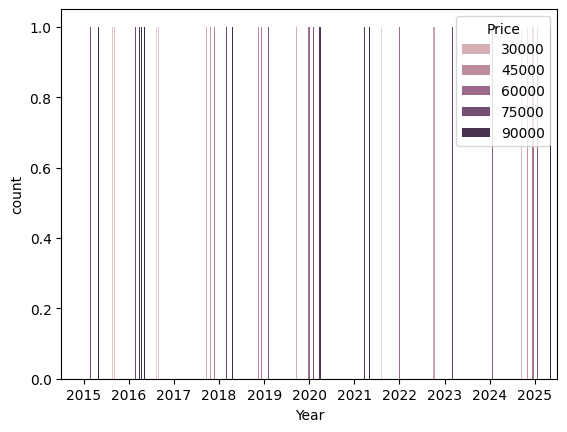

In [244]:
sns.countplot(
    x = 'Year',
    hue = 'Price',
    data = data
)

<Axes: xlabel='Price', ylabel='Brand'>

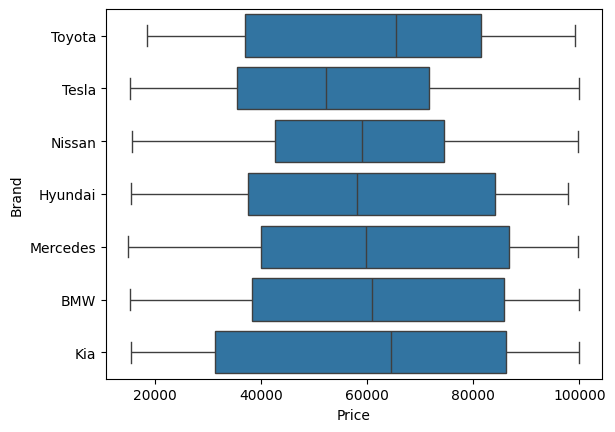

In [245]:
sns.boxplot(
    data = data,
    x = "Price",
    y = 'Brand'
)

<Axes: xlabel='Price', ylabel='Model'>

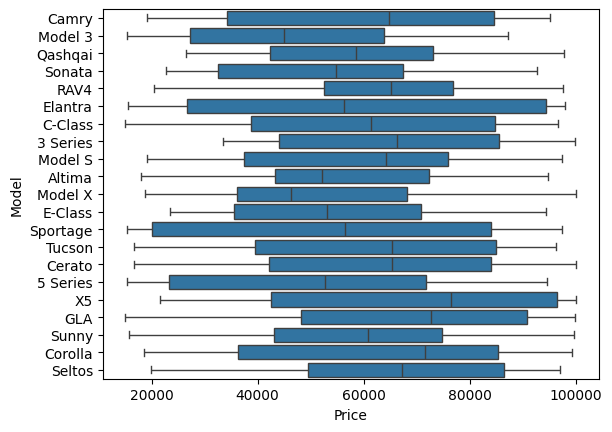

In [246]:
sns.boxplot(
    data = data,
    x = "Price",
    y = 'Model'
)

<Axes: xlabel='Price', ylabel='Status'>

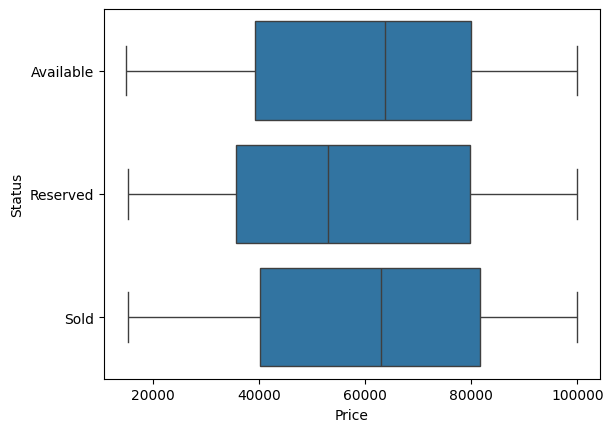

In [247]:
sns.boxplot(
    data = data,
    x = "Price",
    y = 'Status'
)

<Axes: xlabel='Price', ylabel='Count'>

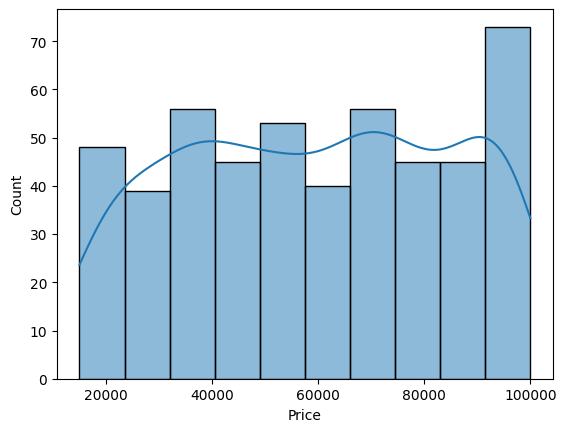

In [248]:
sns.histplot(
    data = data,
    x = "Price",
    kde = True,
)

<Axes: xlabel='Engine_Type', ylabel='count'>

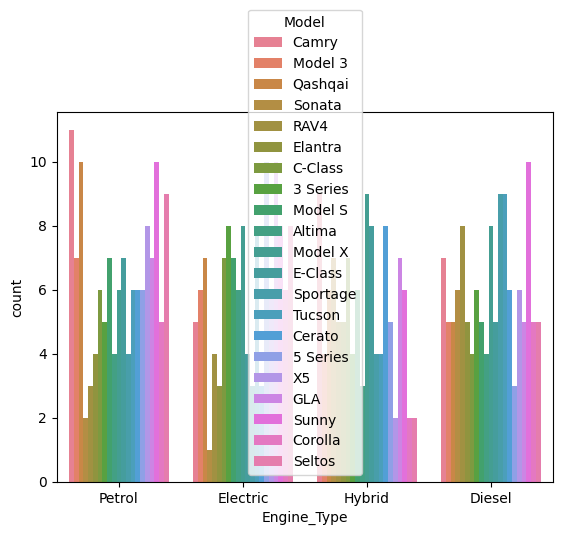

In [249]:
sns.countplot(
    data = data,
    x = 'Engine_Type',
    hue = 'Model'
)

<Axes: xlabel='Engine_Type', ylabel='count'>

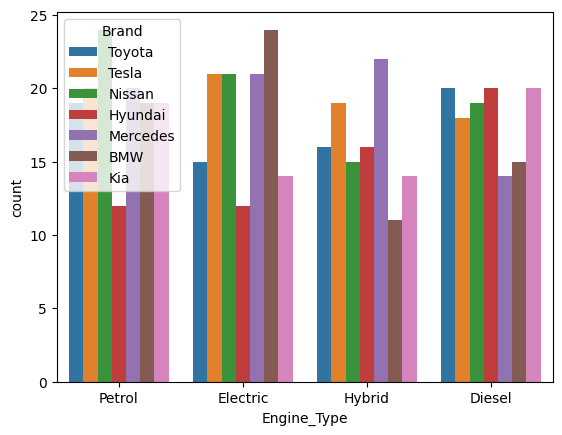

In [250]:
sns.countplot(
    data = data,
    x = 'Engine_Type',
    hue = 'Brand'
)

<Axes: xlabel='Status', ylabel='Count'>

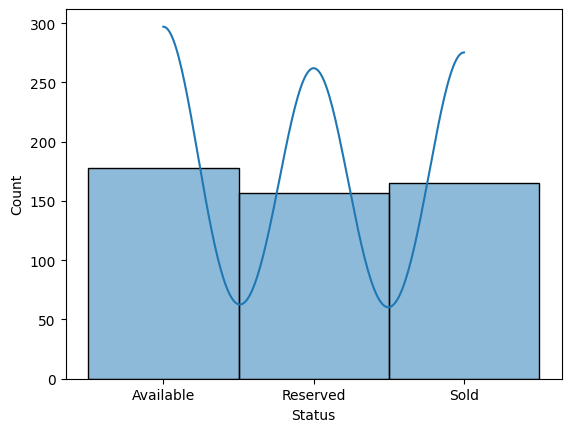

In [251]:
sns.histplot(
    data = data,
    x = 'Status',
    kde = True
)

In [252]:
le = LabelEncoder()

In [253]:
data['Brand'] = le.fit_transform(data['Brand'])
data['Model'] = le.fit_transform(data['Model'])
data['Year'] = le.fit_transform(data['Year'])
data['Color'] = le.fit_transform(data['Color'])
data['Engine_Type'] = le.fit_transform(data['Engine_Type'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Status'] = le.fit_transform(data['Status'])


In [254]:
data

,Car_ID,Brand,Model,Year,Color,Engine_Type,Transmission,Price,Quantity_In_Stock,Status
0,C0001,6,4,8,3,3,0,80338.15,6,0
1,C0002,5,10,4,3,1,1,26437.73,16,0
2,C0003,4,13,3,1,1,0,50158.13,20,0
3,C0004,1,16,10,3,2,0,33026.14,3,0
4,C0005,6,14,1,5,2,1,79672.90,9,1
...,...,...,...,...,...,...,...,...,...,...
495,C0496,0,20,8,3,0,1,53580.76,14,0
496,C0497,4,2,6,0,1,1,24233.93,8,0
497,C0498,3,9,3,3,3,1,55534.60,15,0
498,C0499,5,10,10,1,0,1,59691.91,14,1


In [255]:
data_new = data.drop(columns = 'Car_ID')
data_new

,Brand,Model,Year,Color,Engine_Type,Transmission,Price,Quantity_In_Stock,Status
0,6,4,8,3,3,0,80338.15,6,0
1,5,10,4,3,1,1,26437.73,16,0
2,4,13,3,1,1,0,50158.13,20,0
3,1,16,10,3,2,0,33026.14,3,0
4,6,14,1,5,2,1,79672.90,9,1
...,...,...,...,...,...,...,...,...,...
495,0,20,8,3,0,1,53580.76,14,0
496,4,2,6,0,1,1,24233.93,8,0
497,3,9,3,3,3,1,55534.60,15,0
498,5,10,10,1,0,1,59691.91,14,1


In [256]:
X = data_new.drop(columns = "Price")
y = data_new.iloc[:,6]


In [257]:
y

0      80338.15
1      26437.73
2      50158.13
3      33026.14
4      79672.90
         ...   
495    53580.76
496    24233.93
497    55534.60
498    59691.91
499    75993.80
Name: Price, Length: 500, dtype: float64

In [258]:
X

,Brand,Model,Year,Color,Engine_Type,Transmission,Quantity_In_Stock,Status
0,6,4,8,3,3,0,6,0
1,5,10,4,3,1,1,16,0
2,4,13,3,1,1,0,20,0
3,1,16,10,3,2,0,3,0
4,6,14,1,5,2,1,9,1
...,...,...,...,...,...,...,...,...
495,0,20,8,3,0,1,14,0
496,4,2,6,0,1,1,8,0
497,3,9,3,3,3,1,15,0
498,5,10,10,1,0,1,14,1


In [259]:
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [260]:
X_train

,Brand,Model,Year,Color,Engine_Type,Transmission,Quantity_In_Stock,Status
249,4,13,5,2,0,0,12,0
433,3,7,4,3,3,1,15,2
19,6,4,7,1,1,1,2,2
322,2,17,6,2,1,1,12,2
332,0,0,4,1,0,1,13,2
...,...,...,...,...,...,...,...,...
106,1,19,6,2,1,0,14,2
270,4,13,1,2,0,0,20,2
348,4,13,2,2,2,0,6,0
435,3,9,3,5,0,1,12,0


In [261]:
X_test

,Brand,Model,Year,Color,Engine_Type,Transmission,Quantity_In_Stock,Status
361,4,13,7,4,3,1,13,2
73,1,19,2,2,1,0,5,0
374,3,7,6,3,3,0,6,1
155,1,16,0,2,2,1,13,0
104,2,17,7,5,0,1,12,2
...,...,...,...,...,...,...,...,...
347,1,19,4,3,1,1,1,1
86,3,9,10,2,2,1,10,0
75,4,13,5,4,2,1,15,0
438,1,19,10,2,0,0,17,2


In [262]:
y_train

249    80442.75
433    45192.28
19     68270.75
322    58060.85
332    86322.24
         ...   
106    46740.58
270    60403.39
348    53216.75
435    67934.18
102    33878.13
Name: Price, Length: 400, dtype: float64

In [263]:
y_test

361    75124.70
73     92661.53
374    92158.10
155    22779.54
104    54845.10
         ...   
347    16688.91
86     68728.35
75     97778.44
438    70576.60
15     36006.20
Name: Price, Length: 100, dtype: float64

In [264]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [265]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [266]:
y_pred  = model.predict(X_test)

In [267]:
features = np.array([[0, 0, 9, 0, 3, 1,	10, 1]])
res = model.predict(features)
res

C:\Users\Admin\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([61555.99279778])

In [268]:
model.score(X_train, y_train)

0.018898711440316074

In [269]:
model.score(X_test, y_test)

-0.02417148771094979